# Importing libraries and load dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel("Final_Transport_Dataset.xlsx")
df

,transport_id,station_or_route_name,transport_type_or_name,city,date,occupancy_rate,distance_km,fuel_consumed_liters,month,day_of_week,expected_fuel_litres,fuel_delay_factors,dealy_minutes,operator
0,AP0001,Kurnool-Hyderabad,Volvo AC,Guntur,2024-11-26,65.77,326.58,75.73,November,Tuesday,81.6450,-5.9150,14.478,APSRTC
1,AP0002,Anantapur-Bangalore,Sleeper,Tirupati,2024-10-03,41.42,291.91,71.55,October,Thursday,72.9775,-1.4275,13.713,APSRTC
2,AP0003,Hyderabad-Vijayawada,Volvo AC,Vijayawada,2024-07-06,89.26,238.41,47.85,July,Saturday,59.6025,-11.7525,12.199,APSRTC
3,AP0004,Eluru-Hyderabad,Semi-Sleeper,Kurnool,2024-11-02,83.97,347.55,72.64,November,Saturday,86.8875,-14.2475,5.093,APSRTC
4,AP0005,Kurnool-Hyderabad,Sleeper,Hyderabad,2024-09-20,70.62,444.88,77.17,September,Friday,111.2200,-34.0500,0.000,APSRTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,12202,MADGAON,Garib Rath,Varies,2024-04-28,64.73,1200,880,April,Sunday,NaN,NaN,35.000,Indian Railways
2896,12202,RATNAGIRI,Garib Rath,Varies,2024-02-04,90.63,1200,880,February,Sunday,NaN,NaN,66.000,Indian Railways
2897,12202,PANVEL,Garib Rath,Varies,2024-12-21,49.38,1200,880,December,Saturday,NaN,NaN,41.000,Indian Railways
2898,12202,THANE,Garib Rath,Varies,2024-01-02,52.78,1200,880,January,Tuesday,NaN,NaN,45.000,Indian Railways


# Data cleaning

In [4]:
df.shape

(2900, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transport_id            2900 non-null   object        
 1   station_or_route_name   2900 non-null   object        
 2   transport_type_or_name  2900 non-null   object        
 3   city                    2900 non-null   object        
 4   date                    2900 non-null   datetime64[ns]
 5   occupancy_rate          2900 non-null   float64       
 6   distance_km             2900 non-null   object        
 7   fuel_consumed_liters    2900 non-null   object        
 8   month                   2900 non-null   object        
 9   day_of_week             2900 non-null   object        
 10  expected_fuel_litres    1000 non-null   float64       
 11  fuel_delay_factors      1000 non-null   float64       
 12  dealy_minutes           2670 non-null   float64 

In [6]:
df.isnull().sum()

transport_id                 0
station_or_route_name        0
transport_type_or_name       0
city                         0
date                         0
occupancy_rate               0
distance_km                  0
fuel_consumed_liters         0
month                        0
day_of_week                  0
expected_fuel_litres      1900
fuel_delay_factors        1900
dealy_minutes              230
operator                     0
dtype: int64

In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [9]:
text_cols = ['city', 'station_or_route_name', 'operator']

for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

In [10]:
df = df.rename(columns={
    'dealy_minutes': 'delay_minutes',
    'fuel_delay_factors': 'fuel_delay_factor'
})

In [11]:
df.columns

Index(['transport_id', 'station_or_route_name', 'transport_type_or_name',
       'city', 'date', 'occupancy_rate', 'distance_km', 'fuel_consumed_liters',
       'month', 'day_of_week', 'expected_fuel_litres', 'fuel_delay_factor',
       'delay_minutes', 'operator'],
      dtype='object')

In [12]:
df['delay_minutes'] = df['delay_minutes'].clip(lower=0)

In [13]:
df['distance_km'].dtype

dtype('O')

In [14]:
df['distance_km'] = pd.to_numeric(df['distance_km'], errors='coerce')

In [15]:
df['distance_km'] = df['distance_km'].fillna(0)
df['distance_km'] = df['distance_km'].clip(lower=0)

In [19]:
df['expected_fuel_litres'] = df['expected_fuel_litres'].fillna(
    df['expected_fuel_litres'].median()
)

df['fuel_delay_factor'] = df['fuel_delay_factor'].fillna(
    df['fuel_delay_factor'].mean()
)

In [20]:
df.to_csv("delay_data_cleaned.csv", index=False)

# EDA

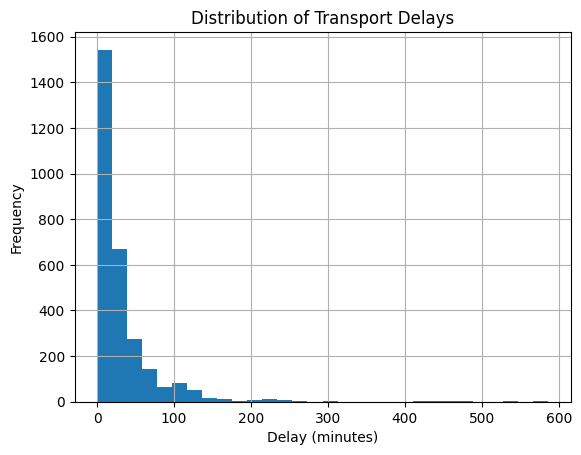

In [29]:
# Delay distribution

import matplotlib.pyplot as plt

plt.figure()
df['delay_minutes'].hist(bins=30)
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Transport Delays")
plt.show()

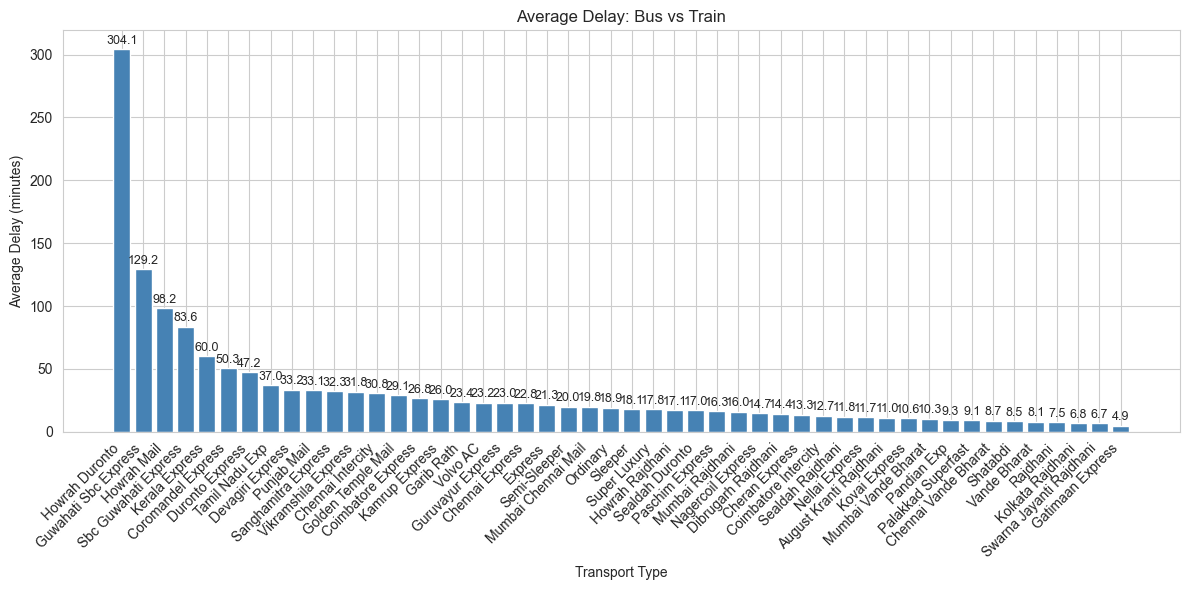

In [32]:
# Delay in bus vs. train

import seaborn as sns

sns.set_style("whitegrid")
avg_delay = df.groupby('transport_type_or_name')['delay_minutes'].mean().sort_values(ascending=False) # Calculate average delay per transport type
colors = ['orange' if 'bus' in str(name).lower() else 'steelblue' for name in avg_delay.index] # Assign colors based on transport type
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_delay.index, avg_delay.values, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Transport Type")
plt.ylabel("Average Delay (minutes)")
plt.title("Average Delay: Bus vs Train")
plt.tight_layout()
plt.show()

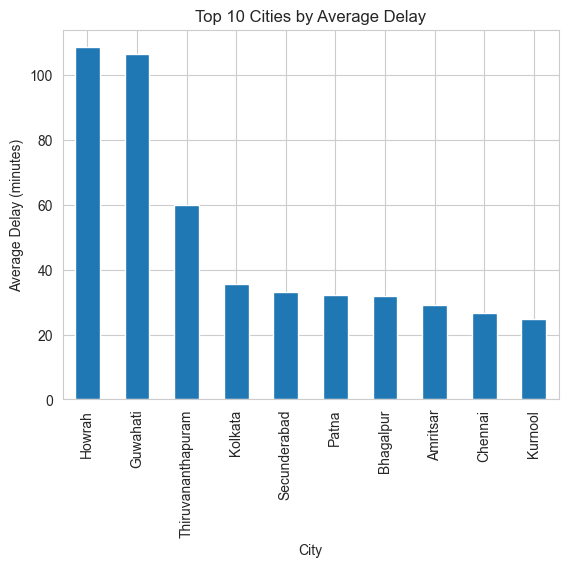

In [37]:
df.groupby('city')['delay_minutes'].mean().sort_values(ascending=False).head(10)

plt.figure()
df.groupby('city')['delay_minutes'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel("City")
plt.ylabel("Average Delay (minutes)")
plt.title("Top 10 Cities by Average Delay")
plt.show()

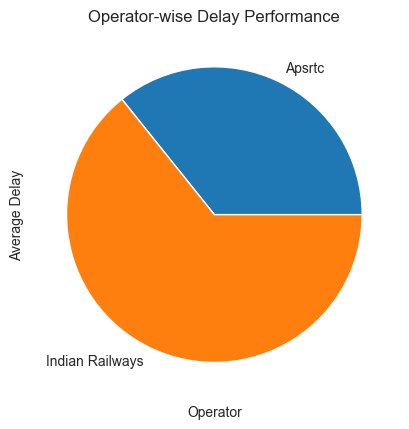

In [41]:
df.groupby('operator')['delay_minutes'].mean()

plt.figure()
df.groupby('operator')['delay_minutes'].mean().plot(kind='pie')
plt.xlabel("Operator")
plt.ylabel("Average Delay")
plt.title("Operator-wise Delay Performance")
plt.show()

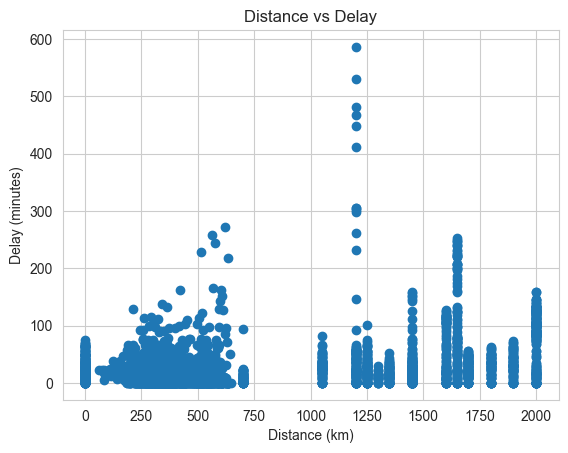

In [42]:
# Distance vs. delay

plt.figure()
plt.scatter(df['distance_km'], df['delay_minutes'])
plt.xlabel("Distance (km)")
plt.ylabel("Delay (minutes)")
plt.title("Distance vs Delay")
plt.show()

# Feature Engineering

In [43]:
df.columns

Index(['transport_id', 'station_or_route_name', 'transport_type_or_name',
       'city', 'date', 'occupancy_rate', 'distance_km', 'fuel_consumed_liters',
       'month', 'day_of_week', 'expected_fuel_litres', 'fuel_delay_factor',
       'delay_minutes', 'operator'],
      dtype='object')

In [44]:
df.insert(0, 'record_id', range(1, len(df) + 1))

In [45]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

In [46]:
def delay_category(x):
    if x == 0:
        return 'On Time'
    elif x <= 10:
        return 'Slight Delay'
    elif x <= 30:
        return 'Moderate Delay'
    else:
        return 'Severe Delay'

df['delay_category'] = df['delay_minutes'].apply(delay_category)

In [47]:
df.head()

,record_id,transport_id,station_or_route_name,transport_type_or_name,city,date,occupancy_rate,distance_km,fuel_consumed_liters,month,day_of_week,expected_fuel_litres,fuel_delay_factor,delay_minutes,operator,delay_category
0,1,AP0001,Kurnool-Hyderabad,Volvo AC,Guntur,2024-11-26,65.77,326.58,75.73,November,Tuesday,81.6450,-5.9150,14.478,Apsrtc,Moderate Delay
1,2,AP0002,Anantapur-Bangalore,Sleeper,Tirupati,2024-10-03,41.42,291.91,71.55,October,Thursday,72.9775,-1.4275,13.713,Apsrtc,Moderate Delay
2,3,AP0003,Hyderabad-Vijayawada,Volvo AC,Vijayawada,2024-07-06,89.26,238.41,47.85,July,Saturday,59.6025,-11.7525,12.199,Apsrtc,Moderate Delay
3,4,AP0004,Eluru-Hyderabad,Semi-Sleeper,Kurnool,2024-11-02,83.97,347.55,72.64,November,Saturday,86.8875,-14.2475,5.093,Apsrtc,Slight Delay
4,5,AP0005,Kurnool-Hyderabad,Sleeper,Hyderabad,2024-09-20,70.62,444.88,77.17,September,Friday,111.2200,-34.0500,0.000,Apsrtc,On Time


In [48]:
# Select feature and target

features = [
    'transport_type_or_name',
    'city',
    'operator',
    'distance_km',
    'occupancy_rate',
    'fuel_delay_factor'
]

X = df[features]
y = df['delay_category']

In [49]:
df['delay_category'].value_counts()

delay_category
Moderate Delay    946
Severe Delay      907
On Time           639
Slight Delay      408
Name: count, dtype: int64

# Model building and training

Logistic Regression -> simple , explainable

Randon Forest -> Handles non-linearity well , Works well with mixed features

XGBoost -> High accuracy , Production-ready , Complex tuning , Harder to explain

We chose Random Forest because transport delays exhibit non-linear behavior influenced by multiple interacting factors like distance, occupancy, and operator efficiency. Random Forest captures these interactions effectively while remaining robust to noise and providing feature importance for interpretability.

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [53]:
# Preprocessing
categorical_cols = ['transport_type_or_name', 'city', 'operator']
numeric_cols = ['distance_km', 'occupancy_rate', 'fuel_delay_factor']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

In [54]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [55]:
# Model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=12,
        random_state=42
    ))
])

In [56]:
# Train
rf_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [57]:
# Evaluate
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Moderate Delay       0.47      0.75      0.58       189
       On Time       0.81      0.59      0.68       128
  Severe Delay       0.75      0.66      0.70       181
  Slight Delay       0.38      0.12      0.19        82

      accuracy                           0.60       580
     macro avg       0.60      0.53      0.54       580
  weighted avg       0.62      0.60      0.58       580



# Hyperparameter Tuning

Default Random Forest parameters are generic. Hyperparameter tuning helps the model better capture delay patterns by controlling tree depth, number of trees, and split behavior, improving accuracy and generalization.

In [58]:
# Define parameter grid

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [8, 12, 16],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [59]:
# Build pipeline

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [65]:
# Grid search

grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__max_depth': [8, 12, ...], 'classifier__min_samples_leaf': [1, 2, ...], 'classifier__min_samples_split': [2, 5, ...], 'classifier__n_estimators': [100, 200, ...]}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('cat', ...), ('num', ...)]"


In [66]:
# Evaluation

best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

y_pred_best = best_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))

Best Parameters: {'classifier__max_depth': 16, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
                precision    recall  f1-score   support

Moderate Delay       0.52      0.77      0.62       189
       On Time       0.84      0.58      0.69       128
  Severe Delay       0.74      0.72      0.73       181
  Slight Delay       0.50      0.21      0.29        82

      accuracy                           0.63       580
     macro avg       0.65      0.57      0.58       580
  weighted avg       0.66      0.63      0.62       580



# Save and Deploy

In [67]:
import joblib

joblib.dump(best_model, 'transport_delay_model.pkl')

['transport_delay_model.pkl']

In [68]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

model = joblib.load('transport_delay_model.pkl')

@app.route('/')
def home():
    return "Transport Delay Prediction API is running"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json

    input_df = pd.DataFrame([{
        'transport_type_or_name': data['transport_type_or_name'],
        'city': data['city'],
        'operator': data['operator'],
        'distance_km': data['distance_km'],
        'occupancy_rate': data['occupancy_rate'],
        'fuel_delay_factor': data['fuel_delay_factor']
    }])

    prediction = model.predict(input_df)[0]

    return jsonify({
        'predicted_delay_category': prediction
    })

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\KIIT0001\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
